### Importation of the module

In [1]:
import sys
sys.path.append('../')

from main import *

### Creation of the linear model

In [2]:
momo = MODEL()

momo.creat_linear(4)

momo.enzymes.add_to_all_reaction()
momo.parameters.add_enzymes()

momo.parameters.add_externals()

momo.elasticity.s.half_satured()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction
Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


### You can then begin the analysis of the model

In [3]:
momo.MI

/home/alequertier/Documents/BadAss/Notebooks/../main.py:501: RuntimeWarning: divide by zero encountered in log
  MI[i][j] = -0.5 * np.log(1 - self.__corelation[i][j] ** 2)


,Temperature,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_0_para,meta_3_para,meta_1,meta_2,reaction_0,reaction_1,reaction_2
Temperature,inf,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
enzyme_reaction_0_para,-0.0,inf,-0.000000,-0.000000,-0.000000,-0.000000,0.401173,0.074210,0.134132,0.168236,0.134132
enzyme_reaction_1_para,-0.0,-0.000000,inf,-0.000000,-0.000000,-0.000000,0.074210,0.074210,0.134132,0.168236,0.134132
enzyme_reaction_2_para,-0.0,-0.000000,-0.000000,inf,-0.000000,-0.000000,0.074210,0.401173,0.134132,0.168236,0.134132
meta_0_para,-0.0,-0.000000,-0.000000,-0.000000,inf,-0.000000,0.074210,0.017546,0.134132,0.037054,0.030312
meta_3_para,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,inf,0.017546,0.074210,0.030312,0.037054,0.134132
meta_1,-0.0,0.401173,0.074210,0.074210,0.074210,0.017546,inf,0.181490,0.026020,0.001233,0.016496
meta_2,-0.0,0.074210,0.074210,0.401173,0.017546,0.074210,0.181490,inf,0.016496,0.001233,0.026020
reaction_0,-0.0,0.134132,0.134132,0.134132,0.134132,0.030312,0.026020,0.016496,inf,0.355048,0.125163
reaction_1,-0.0,0.168236,0.168236,0.168236,0.037054,0.037054,0.001233,0.001233,0.355048,inf,0.355048


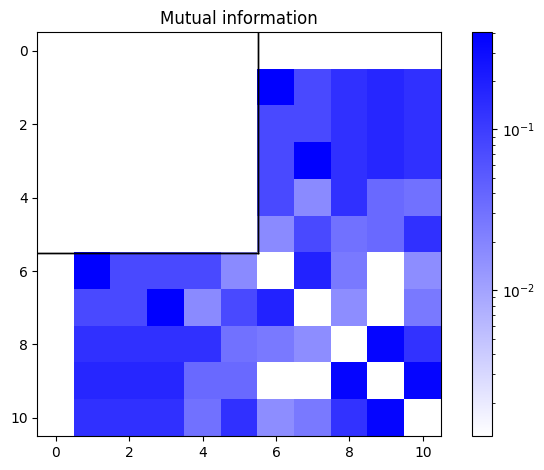

In [4]:
momo.plot(result="MI")

### You can add regulation arrows

In [5]:
momo.reactions.df

,Metabolites,Equilibrium constant,Law,Flux (mmol/gDW/h)
reaction_0,"{'meta_0': -1, 'meta_1': 1}",1.0,,1
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,,1
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,,1


#### Exernite metabolite too ?

In [6]:
momo.regulations.add(name="regu_alo", regulated="reaction_1", regulator="meta_2", allosteric=True)

In [7]:
momo.regulations.add(name="regu_transcri", regulated="reaction_1", regulator="meta_2", allosteric=False)

In [8]:
momo.regulations.df

,Regulated flux,Regulator,Coefficient of regulation,Type regulation
regu_alo,reaction_1,meta_2,1,allosteric
regu_transcri,reaction_1,meta_2,1,transcriptional


#### You can also study periodic perturbation

In [9]:
momo.frequency_omega = 1.0

In [10]:
momo.Jacobian

,meta_1,meta_2,enzyme_regu_transcri
meta_1,-1.000000e+00-1.000000e+00j,-0.5+0.0j,0.0+0.0j
meta_2,5.000000e-01+0.000000e+00j,-0.0-1.0j,0.0+0.0j
enzyme_regu_transcri,2.775558e-16+0.000000e+00j,1.0+0.0j,0.0-1.0j


#### You can also study temporal control coefficients

In [11]:
momo.frequency_omega = 0.0

In [12]:
momo.temporal_C_s_p(t=1)

array([[ 0.55972788, -0.83374146,  0.27401359, -0.02340139,  0.02340139],
       [-0.22246844,  0.38406222, -0.16159378, -0.20143823,  0.20143823],
       [-0.22958199,  0.13123405,  0.09834793,  0.85255571, -0.85255571]])

In [13]:
momo.temporal_R_s_p(t=1)

array([[ 0.        ,  0.55972788, -0.83374146,  0.27401359,  0.        ,
         0.        ],
       [ 0.        , -0.22246844,  0.38406222, -0.16159378,  0.        ,
         0.        ],
       [ 0.        , -0.22958199,  0.13123405,  0.09834793,  0.        ,
         0.        ]])

#### Thermodynamic sampling of the elsaticity coefficient

In [14]:
momo.elasticity.s.fill_sub_elasticity()

In [15]:
momo.elasticity.s.df

,meta_1,meta_2,enzyme_regu_transcri
reaction_0,-0.248992,-1.553978,0.309159
reaction_1,-0.546390,1.147382,-1.173661
reaction_2,0.314312,-0.082102,0.927490
creation_regu_transcri,-0.379952,-0.582739,0.316330
destruction_regu_transcri,0.094790,0.489721,0.562636


#### It is possible to study group of variable

In [16]:
momo.covariance

,Temperature,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_0_para,meta_3_para,meta_1,meta_2,enzyme_regu_transcri,reaction_0,reaction_1,reaction_2,creation_regu_transcri,destruction_regu_transcri
Temperature,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
enzyme_reaction_0_para,0.0,1.000000,0.000000,0.000000,0.0,0.0,-3.945333,1.212369,2.325555,0.817327,0.817327,0.817327,1.528187,1.528187
enzyme_reaction_1_para,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.463957,-0.238925,0.146071,0.300922,0.300922,0.300922,0.009156,0.009156
enzyme_reaction_2_para,0.0,0.000000,0.000000,1.000000,0.0,0.0,3.481376,-0.973444,-2.471625,-0.118249,-0.118249,-0.118249,-1.537343,-1.537343
meta_0_para,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
meta_3_para,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
meta_1,0.0,-3.945333,0.463957,3.481376,0.0,0.0,27.900885,-8.282976,-17.711972,-3.496680,-3.496680,-3.496680,-11.377025,-11.377025
meta_2,0.0,1.212369,-0.238925,-0.973444,0.0,0.0,-8.282976,2.474518,5.190519,1.034112,1.034112,1.034112,3.347056,3.347056
enzyme_regu_transcri,0.0,2.325555,0.146071,-2.471625,0.0,0.0,-17.711972,5.190519,11.538472,2.236961,2.236961,2.236961,7.354954,7.354954
reaction_0,0.0,0.817327,0.300922,-0.118249,0.0,0.0,-3.496680,1.034112,2.236961,0.772560,0.772560,0.772560,1.433572,1.433572


In [17]:
momo.group_MI(groups=[["meta_1", "reaction_0"],["meta_3_para","meta_0_para"]])

,0,1
0,inf,0.0
1,0.0,inf


#### We can also fix value

In [22]:
momo.parameters.remove("Temperature")

Name of the removed parameter : Temperature


/home/alequertier/Documents/BadAss/Notebooks/../main.py:1185: RuntimeWarning: invalid value encountered in sqrt
  SD_df.at[element, "New SD"] = np.sqrt(Cov_ss_f_df.at[element, element])
/home/alequertier/Documents/BadAss/Notebooks/../main.py:1193: RuntimeWarning: invalid value encountered in sqrt
  - np.sqrt(Cov_ss_f_df.at[element, element])


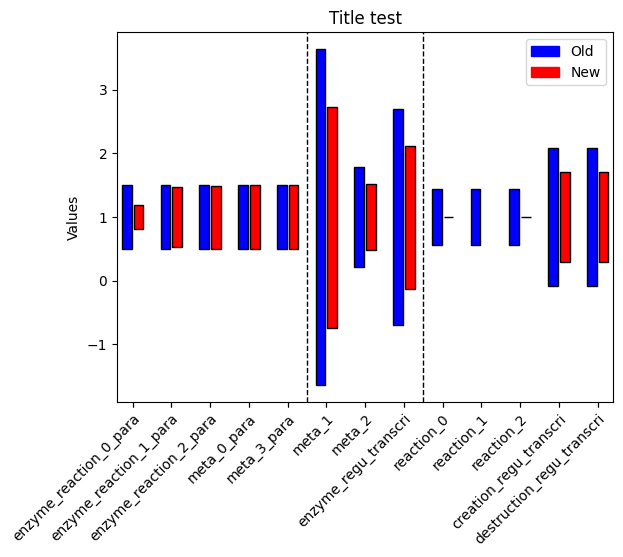

(                             Old SD        New SD  Delta SD
 enzyme_reaction_0_para     1.000000  3.678486e-01  0.632151
 enzyme_reaction_1_para     1.000000  9.395673e-01  0.060433
 enzyme_reaction_2_para     1.000000  9.909090e-01  0.009091
 meta_0_para                1.000000  1.000000e+00  0.000000
 meta_3_para                1.000000  1.000000e+00  0.000000
 meta_1                     5.282129  3.474850e+00  1.807279
 meta_2                     1.573060  1.044176e+00  0.528884
 enzyme_regu_transcri       3.396833  2.249736e+00  1.147097
 reaction_0                 0.878954  1.053671e-08  0.878954
 reaction_1                 0.878954           NaN       NaN
 reaction_2                 0.878954  0.000000e+00  0.878954
 creation_regu_transcri     2.167686  1.427833e+00  0.739853
 destruction_regu_transcri  2.167686  1.427833e+00  0.739853,
                            Old mean  New mean  Delta mean
 enzyme_reaction_0_para            1         1           0
 enzyme_reaction_1_para    

In [25]:
momo.group_entropy_fixed_vector(elements_to_fixe=["reaction_2"],elements_to_study=[], plot=True, return_all=True)